In [2]:
import pandas as pd   #import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Transformation and modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [3]:
churn_df = pd.read_csv('C:\\Users\\User\\Downloads\\customer_churn.csv')   #loading dataset
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churn_df['Churn'].value_counts(normalize=True)  # Answers for no account for about 73% of responses while for yes that's about 27% only. 

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [6]:
churn_df.columns = churn_df.columns.str.lower().str.replace(' ', '_').str.replace('[^\w]', '')

C:\Users\User\AppData\Local\Temp\ipykernel_12316\3216490405.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  churn_df.columns = churn_df.columns.str.lower().str.replace(' ', '_').str.replace('[^\w]', '')


In [7]:
churn_df["totalcharges"] = pd.to_numeric(churn_df.totalcharges, errors ='coerce')

In [8]:
churn_df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [9]:
churn_df['totalcharges'].isna().sum() / len(churn_df)

0.001561834445548772

In [10]:
churn_df['totalcharges'] = churn_df['totalcharges'].replace(np.nan, churn_df['totalcharges'].mean())

In [11]:
churn_df.isna().sum()    #lets check it again

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
features = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']

X = pd.DataFrame(data=churn_df, columns=features)
y = pd.DataFrame(data=churn_df, columns=['churn'])

In [15]:
X.head(), y.head()   #check the values again if they are correct

(   tenure  seniorcitizen  monthlycharges  totalcharges
 0       1              0           29.85         29.85
 1      34              0           56.95       1889.50
 2       2              0           53.85        108.15
 3      45              0           42.30       1840.75
 4       2              0           70.70        151.65,
   churn
 0    No
 1    No
 2   Yes
 3    No
 4   Yes)

In [16]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

c:\Users\User\anaconda31\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Logreg = LogisticRegression(random_state = 42)
dtc = DecisionTreeClassifier(random_state = 42)
classifiers = [Logreg, dtc]

In [23]:
def model_comparison(classifiers, X_train, X_test, y_train, y_test):  #function for modeling incuding cross validation
    train = []
    test = []
    cv = []

    for classifier in classifiers:
        classifier.fit(X_train,y_train)
        y_predict_train = classifier.predict(X_train)
        y_predict_test = classifier.predict(X_test)
        train.append(accuracy_score(y_train,y_predict_train))
        test.append(accuracy_score(y_test,y_predict_test))
        cv.append(np.mean(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = 10, n_jobs = -1 )))
    
    model_scores = {'Train Accuracy': train,
          'Test Accuracy': test,
          'Cross Validation Accuracy': cv}
    model_scores = pd.DataFrame(model_scores).T
    model_scores.columns = 'Logistic Regression','Decision Tree'
    
    return model_scores

In [24]:
model_comparison(classifiers, X_train, X_test, y_train, y_test)

,Logistic Regression,Decision Tree
Train Accuracy,0.790669,0.990872
Test Accuracy,0.795078,0.724089
Cross Validation Accuracy,0.787424,0.722312


Best accuracy:  0.792238523426408  at K  19


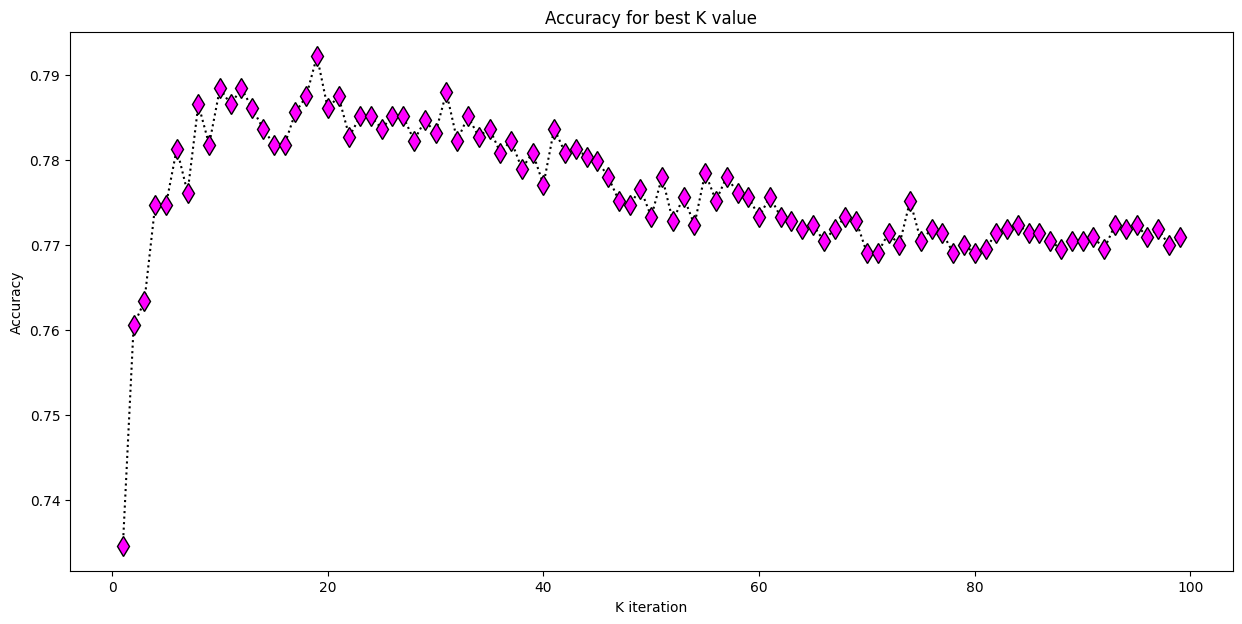

In [29]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []

for neighbor in range(1,100):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(15,7))
plt.plot(range(1,100), accuracy, color="black", linestyle="dotted",
         marker = "d", markerfacecolor="magenta", markersize=10)
plt.title("Accuracy for best K value")
plt.xlabel("K iteration")
plt.ylabel("Accuracy")
print("Best accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

In [30]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(k_neighbors = 24)
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)


adasyn = ADASYN(n_neighbors = 24)
X_train_ADASYN,y_train_ADASYN = adasyn.fit_resample(X_train,y_train)

In [31]:
model_comparison(classifiers, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

,Logistic Regression,Decision Tree
Train Accuracy,0.727373,0.993810
Test Accuracy,0.729768,0.688594
Cross Validation Accuracy,0.725447,0.710316


In [32]:
model_comparison(classifiers, X_train_ADASYN, X_test, y_train_ADASYN, y_test)

,Logistic Regression,Decision Tree
Train Accuracy,0.704163,0.993659
Test Accuracy,0.690487,0.682915
Cross Validation Accuracy,0.702503,0.691625


Oversampling didn't improve performance, and both methods gave similar results with different classifiers.

##TomekLinks

In [33]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection # uses tomeklinks to remove noisy samples

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train,y_train)

oss = OneSidedSelection(random_state=0)
X_train_oss, y_train_oss = oss.fit_resample(X_train,y_train)

In [34]:
model_comparison(classifiers, X_train_tomek, X_test, y_train_tomek, y_test)

,Logistic Regression,Decision Tree
Train Accuracy,0.789894,0.990027
Test Accuracy,0.782300,0.723142
Cross Validation Accuracy,0.790994,0.745795


In [35]:
model_comparison(classifiers, X_train_oss, X_test, y_train_oss, y_test)

,Logistic Regression,Decision Tree
Train Accuracy,0.790822,0.989975
Test Accuracy,0.787979,0.719356
Cross Validation Accuracy,0.789480,0.750054


Tomek Links worked a little better than one-sided selection. However, decision trees seem to have learned too much from the training data in both cases (overfitting). Using cross-validation didn't have a clear impact on either technique.

--Just to sumerize ,the simplest model, an imbalanced logistic regression without cross-validation, achieved the best accuracy. Decision trees consistently overfit and underperform compared to logistic regression, regardless of balancing techniques. Cross-validation offered minimal and inconsistent benefits.